In [1]:
import pandas as pd
import numpy as np
# import

In [2]:
df = pd.read_csv("WMT.csv", parse_dates=["Date"])
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1972-08-25,0.063477,0.064697,0.063477,0.064453,0.036098,2508800.0
1,1972-08-28,0.064453,0.064941,0.064209,0.064209,0.035962,972800.0
2,1972-08-29,0.063965,0.063965,0.063477,0.063477,0.035552,1945600.0
3,1972-08-30,0.063477,0.063477,0.062988,0.063477,0.035552,409600.0
4,1972-08-31,0.062988,0.062988,0.062500,0.062500,0.035005,870400.0


У нас 12510 наблюдений

In [3]:
df.shape

(12510, 7)

In [38]:
df.count()

Date         12510
Open         12476
High         12485
Low          12509
Close        12492
Adj Close    12510
Volume       12496
dtype: int64

Предметная область - аналитика курса стоимости ценных бумаг магазина Walmart

* Date - дата
* Open - цена открытия
* High - наивысшая точка стоимости в этот день
* Low - низшая точка стоимости в этот день
* Close - цена закрытия
* Adj Close - скорректированная цена закрытия изменяет цену закрытия акции, чтобы отразить стоимость этой акции после учета любых изменений
* Volume - количество акций, проданных за конкретную акцию, индекс или другие инвестиции в течение дня

Задача обучения - регрессия

## Провести в Jupyter средствами pandas, sklearn, seaborn описательный анализ

In [4]:
df.describe()

,Open,Low,Adj Close,Volume
count,12476.000000,12509.000000,12510.000000,1.249600e+04
mean,35.706034,35.318912,28.915924,7.547246e+06
std,37.454145,37.127724,34.677862,6.231867e+06
min,0.015625,0.014404,0.008804,0.000000e+00
25%,1.386719,1.375000,0.851606,3.894400e+06
50%,16.765625,16.343750,10.601800,6.321400e+06
75%,56.500000,55.750000,40.595537,9.509050e+06
max,153.600006,151.660004,151.039993,1.318336e+08


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12510 entries, 0 to 12509
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       12510 non-null  datetime64[ns]
 1   Open       12476 non-null  float64       
 2   High       12485 non-null  object        
 3   Low        12509 non-null  float64       
 4   Close      12492 non-null  object        
 5   Adj Close  12510 non-null  float64       
 6   Volume     12496 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 684.3+ KB


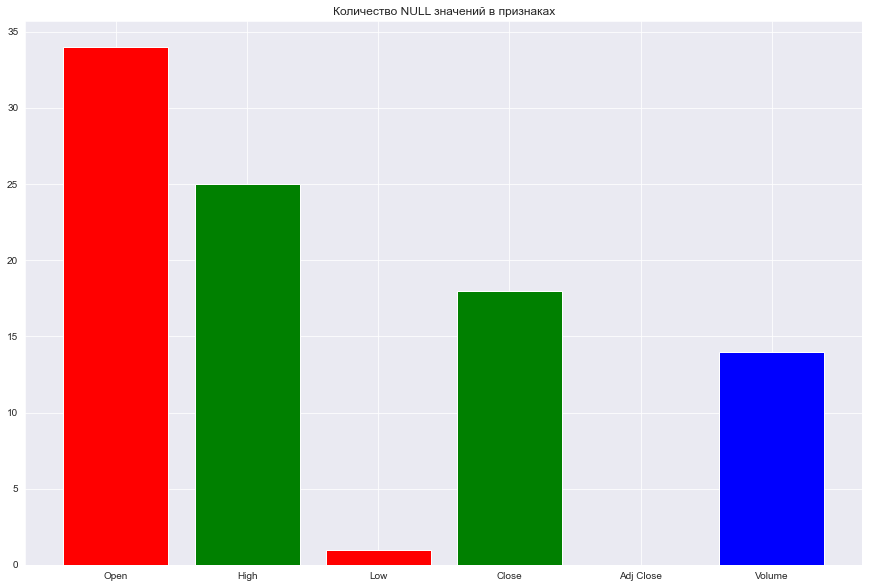

In [57]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))

groups = df.drop(labels=["Date"], axis=1).columns
len_of_nulls = df.drop(labels=["Date"], axis=1).isnull().sum()
colors = [["r", "b", "g"][int(np.random.randint(0, 3, 1))] for _ in len_of_nulls]

plt.bar(groups, len_of_nulls, color=colors)
plt.title("Количество NULL значений в признаках")
plt.show()

In [6]:
df.isnull().sum()

Date          0
Open         34
High         25
Low           1
Close        18
Adj Close     0
Volume       14
dtype: int64

In [7]:
year_close = df["Adj Close"].groupby(df["Date"].dt.year).median()
year_close

Date
1972      0.035347
1973      0.023997
1974      0.017418
1975      0.025937
1976      0.032409
1977      0.032491
1978      0.052124
1979      0.060360
1980      0.089725
1981      0.172687
1982      0.245438
1983      0.734560
1984      0.752986
1985      0.961974
1986      1.705572
1987      2.229057
1988      2.333196
1989      3.101908
1990      4.262793
1991      6.930233
1992      8.806628
1993      8.569123
1994      7.866016
1995      7.917713
1996      7.983683
1997     11.123805
1998     19.490142
1999     31.048468
2000     35.981571
2001     34.899178
2002     37.118162
2003     37.287388
2004     37.002913
2005     33.709298
2006     32.583252
2007     33.763332
2008     40.715679
2009     37.155014
2010     40.386944
2011     41.714233
2012     54.688268
2013     61.825128
2014     64.086815
2015     62.361294
2016     62.072937
2017     71.272911
2018     85.663094
2019    104.750129
2020    125.391319
2021    139.955933
2022    140.900047
Name: Adj Close, dtype: fl

In [8]:
year_volume = df["Volume"].groupby(df["Date"].dt.year).median()
year_volume

Date
1972      716800.0
1973      921600.0
1974      460800.0
1975     1024000.0
1976     1740800.0
1977     1510400.0
1978     2201600.0
1979     1152000.0
1980     1612800.0
1981     1740800.0
1982     4121600.0
1983     5267200.0
1984     5427200.0
1985     5340000.0
1986     5980800.0
1987     7147200.0
1988     4556000.0
1989     4292400.0
1990     5307200.0
1991     4648800.0
1992     4155600.0
1993     5376800.0
1994     4521300.0
1995     5794800.0
1996     6218800.0
1997     6373600.0
1998     6008300.0
1999     6268400.0
2000     7265350.0
2001     7108900.0
2002     8377450.0
2003     7644650.0
2004     9189500.0
2005    11451150.0
2006    12302300.0
2007    15830000.0
2008    22639700.0
2009    17388100.0
2010    12396650.0
2011    10979900.0
2012     8019250.0
2013     6359300.0
2014     5979300.0
2015     7580750.0
2016     8086950.0
2017     7879400.0
2018     8305500.0
2019     5469900.0
2020     7453200.0
2021     7074400.0
2022     7767650.0
Name: Volume, dtype: float

In [28]:
year_adj = df["Adj Close"].groupby(df["Date"].dt.year).median()
year_adj

Date
1972      0.035347
1973      0.023997
1974      0.017418
1975      0.025937
1976      0.032409
1977      0.032491
1978      0.052124
1979      0.060360
1980      0.089725
1981      0.172687
1982      0.245438
1983      0.734560
1984      0.752986
1985      0.961974
1986      1.705572
1987      2.229057
1988      2.333196
1989      3.101908
1990      4.262793
1991      6.930233
1992      8.806628
1993      8.569123
1994      7.866016
1995      7.917713
1996      7.983683
1997     11.123805
1998     19.490142
1999     31.048468
2000     35.981571
2001     34.899178
2002     37.118162
2003     37.287388
2004     37.002913
2005     33.709298
2006     32.583252
2007     33.763332
2008     40.715679
2009     37.155014
2010     40.386944
2011     41.714233
2012     54.688268
2013     61.825128
2014     64.086815
2015     62.361294
2016     62.072937
2017     71.272911
2018     85.663094
2019    104.750129
2020    125.391319
2021    139.955933
2022    140.900047
Name: Adj Close, dtype: fl

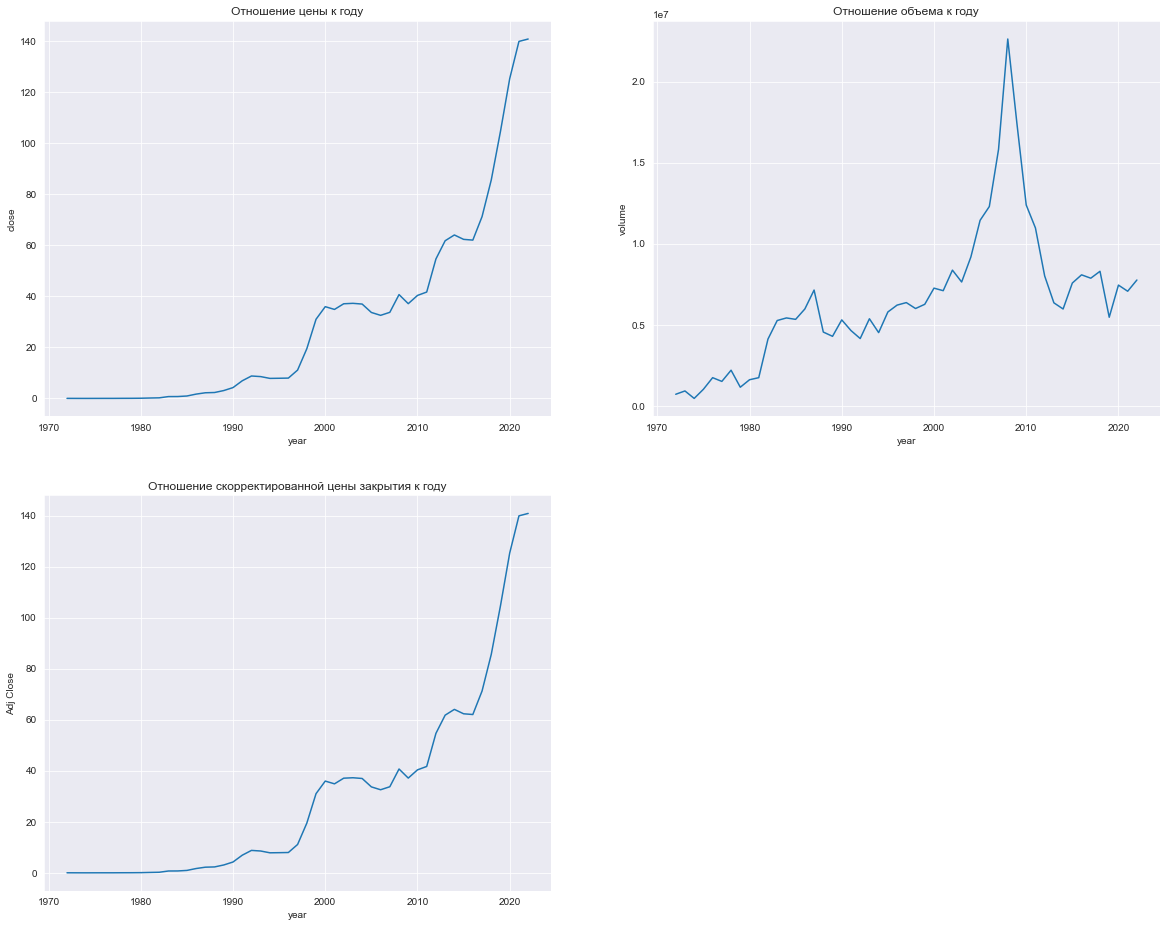

In [31]:
import matplotlib.pyplot as plt


plt.figure(figsize=(20, 16))

ax1 = plt.subplot(221)
ax1.plot(year_close.index, year_close.values)
ax1.title.set_text("Отношение цены к году")
ax1.set_ylabel('close')
ax1.set_xlabel('year')

ax2 = plt.subplot(222)
ax2.plot(year_volume.index, year_volume.values)
ax2.title.set_text("Отношение объема к году")
ax2.set_ylabel('volume')
ax2.set_xlabel('year')

ax3 = plt.subplot(223)
ax3.plot(year_adj.index, year_adj.values)
ax3.title.set_text("Отношение скорректированной цены закрытия к году")
ax3.set_ylabel('Adj Close')
ax3.set_xlabel('year')

plt.show()

Все показатели с каждым годом растут

In [27]:
df.drop(labels=["Date"], axis=1).isnull().sum() / df.drop(labels=["Date"], axis=1).count()

Open         0.002725
High         0.002002
Low          0.000080
Close        0.001441
Adj Close    0.000000
Volume       0.001120
dtype: float64

In [120]:
df.corr()

,Open,Low,Adj Close,Volume
Open,1.000000,0.999923,0.987254,0.318474
Low,0.999923,1.000000,0.987619,0.316059
Adj Close,0.987254,0.987619,1.000000,0.262400
Volume,0.318474,0.316059,0.262400,1.000000


In [122]:
df.corr().style.background_gradient(cmap='coolwarm')

,Open,Low,Adj Close,Volume
Open,1.000000,0.999923,0.987254,0.318474
Low,0.999923,1.000000,0.987619,0.316059
Adj Close,0.987254,0.987619,1.000000,0.262400
Volume,0.318474,0.316059,0.262400,1.000000


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

first_col = ['Open','Close']
second_col = ['High','Low']

def dist_plot(df,col_list,x,y,figsize, title) :
    fig,ax = plt.subplots(x,y, figsize = figsize)

    n = 0

    for a in col_list :
        sns.distplot(df[a], ax = ax[n])

        ax[n].axvline(df[a].mean(),linestyle = '--', linewidth =2)
        plt.xlabel(a.title())

        n += 1

    plt.suptitle(title)
    plt.show()

dist_plot(df, second_col, 1,2, (10,8), 'High and Low Price Distribution at Walmart')
dist_plot(df, first_col, 1,2, (10,8), 'Open and Close Price Distribution at Walmart')
